In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
a_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/after.png')

b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2GRAY)
a_img = cv2.cvtColor(a_img, cv2.COLOR_BGR2GRAY)


In [3]:
b_img.max(), np.median(b_img), b_img.min()

(246, 77.0, 14)

In [13]:
thresh, thresh_img = cv2.threshold(b_img, 90, 256, type=cv2.THRESH_BINARY)

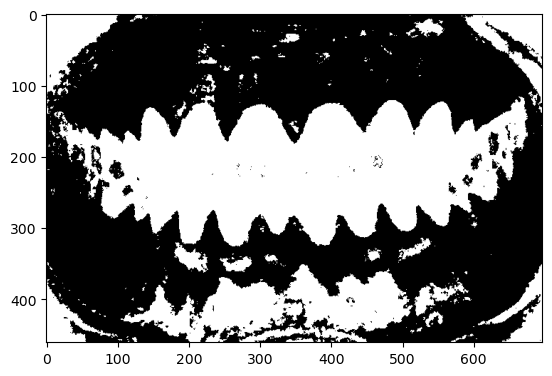

In [54]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
b_img = cv2.cvtColor(b_img, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(b_img)

# print(b_img_h.max(), np.median(b_img_h), b_img_h.min())

thresh, thresh_img = cv2.threshold(h, 5, 180, type=cv2.THRESH_BINARY)

plt.imshow(thresh_img, cmap='gray')
plt.show()

246 63.0 12
245 57.0 6


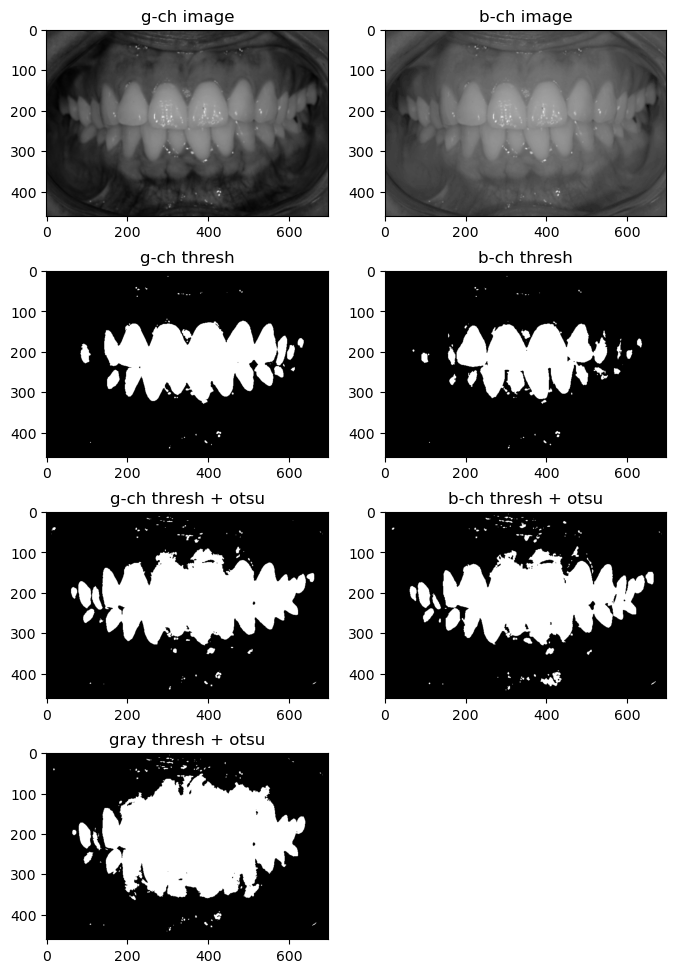

In [74]:
## RGB 채널 분리

## 치아만 분리해내기 위함
## RGB 중 하나의 channel만 thresholding 적용
## 잇몸색깔을 주로 이루는 Red channel만 분리하는건 제외했음

## 결론 => Green channel만 분리하는 것은 사용할 가치가 있음

b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
b,g,r = cv2.split(b_img)

# green channel img 
g_img = g
# blue channel img 
b_img = b

# g_img thresholding
_, thresh_g = cv2.threshold(g_img, 100, 255, type=cv2.THRESH_BINARY)
print(g_img.max(), np.median(g_img), g_img.min())

#b_img thresholding
_, thresh_b = cv2.threshold(b_img, 100, 255, type=cv2.THRESH_BINARY)
print(b_img.max(), np.median(b_img), b_img.min())

# g_img thresholding + otsu
t_g, thresh_g_otsu = cv2.threshold(g_img, -1, 255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#b_img thresholding + otsu
t_b, thresh_b_otsu = cv2.threshold(b_img, -1, 255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# RGB -> gary thresholding + otsu
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png', 0)
t, thresh_otsu = cv2.threshold(b_img, -1, 255, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)


j = 4
i = 2

plt.figure(figsize=(8,12))
plt.subplot(j,i,1)
plt.imshow(g_img, cmap='gray')
plt.title("g-ch image")

plt.subplot(j,i,2)
plt.imshow(b_img, cmap='gray')
plt.title("b-ch image")

plt.subplot(j,i,3)
plt.imshow(thresh_g, cmap='gray')
plt.title("g-ch thresh")

plt.subplot(j,i,4)
plt.imshow(thresh_b, cmap='gray')
plt.title("b-ch thresh")

plt.subplot(j,i,5)
plt.imshow(thresh_g_otsu, cmap='gray')
plt.title("g-ch thresh + otsu")

plt.subplot(j,i,6)
plt.imshow(thresh_b_otsu, cmap='gray')
plt.title("b-ch thresh + otsu")

plt.subplot(j,i,7)
plt.imshow(thresh_otsu, cmap='gray')
plt.title("gray thresh + otsu")

plt.show()

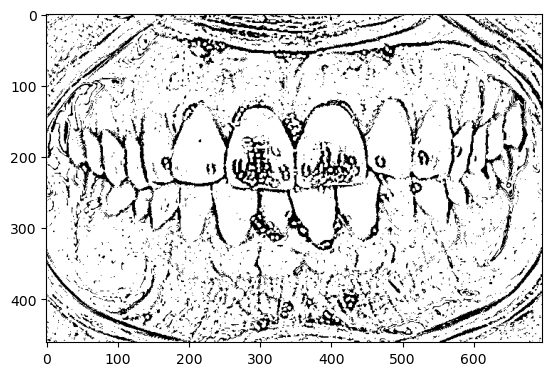

In [84]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png', 0)
th3 = cv2.adaptiveThreshold(b_img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,2)

plt.imshow(th3, cmap='gray')

plt.show()

246 77.0 14
246 63.0 12


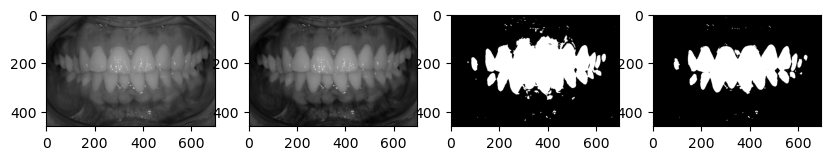

In [38]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png')
b_img_c = b_img.copy()

b_img_c = cv2.cvtColor(b_img_c, cv2.COLOR_BGR2GRAY)
thresh, thresh_img = cv2.threshold(b_img_c, 100, 200, type=cv2.THRESH_BINARY)
print(b_img_c.max(), np.median(b_img_c), b_img_c.min())

contours, heirarchy = cv2.findContours(thresh_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
# cnt = contours[0]
# cv2.drawContours(b_img_c, [cnt], -1, (0,255,255), 5)

b, g_img ,r = cv2.split(b_img)
thresh, thresh_g_img = cv2.threshold(g_img, 100, 255, type=cv2.THRESH_BINARY)
print(g_img.max(), np.median(g_img), g_img.min())


i = 4

plt.figure(figsize=(10,15))
plt.subplot(1,i,1)
plt.imshow(b_img_c, cmap='gray')

plt.subplot(1,i,3)
plt.imshow(thresh_img, cmap='gray')

plt.subplot(1,i,2)
plt.imshow(g, cmap='gray')

plt.subplot(1,i,4)
plt.imshow(thresh_g_img, cmap='gray')

plt.show()

In [14]:
thresh_img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

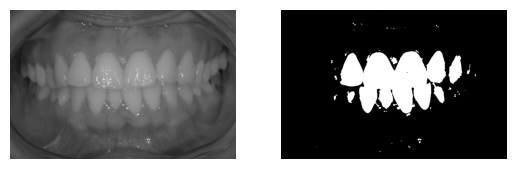

In [38]:
b_img = cv2.imread('/home/tkd_010/ImageProcessing/study/image_registeration/before.png', 0)

thresh, thresh_img = cv2.threshold(b_img, 120, 200, type=cv2.THRESH_BINARY)

plt.subplot(121)
plt.imshow(b_img, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(thresh_img, cmap='gray')
plt.axis('off')
plt.show()